# Mathematics of Machine Learning
## Chapter 3: Linear classification methods
### Section 3.4: Soft SVM Rule

In [7]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#### (0) Data Preparation

In [8]:
# Load data
X = np.genfromtxt("data_MNIST_78_X.csv", delimiter=',')
y = np.genfromtxt("data_MNIST_78_Y.csv", delimiter=',')

In [9]:
# Transfom the labels in +1 (7) and -1 (8)
y[y!=7]=-1
y[y==7]=1

# Size of the dataset
m = len(y)

# Number of features (= dimension of the feature space)
d = X.shape[0]

#### (1) Apply soft SVM rule

In [10]:
# Create a support vector classifier
lam = 1/m
SVM = svm.SVC(C=1/(2*m*lam), kernel='linear')

In [11]:
# Learn on the train subset
SVM.fit(X.T, y)

# Output all parameters
SVM.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

0.0020633872565203326


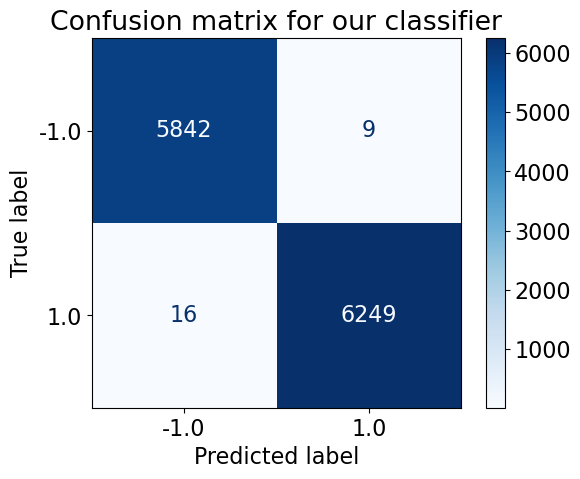

In [13]:
# Determine misclassification rate
label = SVM.predict(X.T)
print(1 - accuracy_score(y, label))

disp = ConfusionMatrixDisplay.from_estimator(
        SVM,
        X.T,
        y,
        cmap=plt.cm.Blues,
        # normalize='true'
    )
plt.title('Confusion matrix for our classifier')
plt.show(disp)

In [14]:
# Get support vectors
support_vectors = SVM.support_vectors_
print(support_vectors.shape)

# Calculate weight vector
alphas = SVM.dual_coef_
w_S_cal = np.dot(alphas, support_vectors)

# Get weight vector directly
w_S = SVM.coef_

(285, 784)


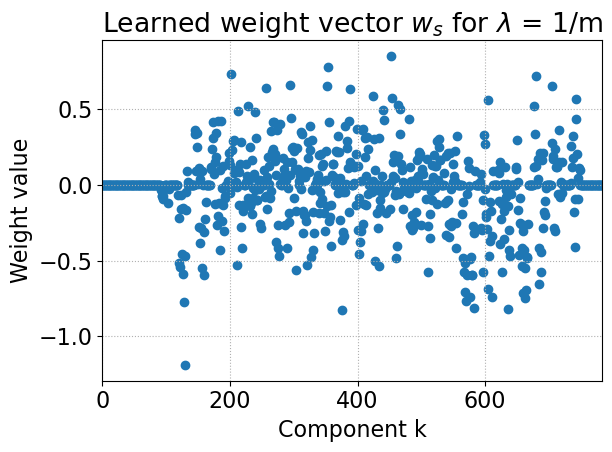

In [18]:
# Plot the weight vector
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
ax.scatter(np.arange(len(w_S[0])), w_S[0])
ax.set_title("Learned weight vector $w_s$ for $ \lambda $ = 1/m")
ax.set_xlabel("Component k")
ax.set_ylabel("Weight value")
ax.grid(linestyle='dotted')
ax.set_xlim(0, 783)
fig.tight_layout()
plt.show()

In [19]:
# Get bias
bias = SVM.intercept_
print(bias)

[2.38496736]


In [22]:
# Find misclassifications
misclassifications = (y * (w_S @ X + bias)) < 0
ind_wrong = np.where(misclassifications[0] == True)[0]
print(ind_wrong)

[  330   395   663  1601  2333  2757  2790  2850  3808  3843  4018  4584
  4799  4980  5217  6021  6809  7135  8217  8738 10416 10608 11059 11136
 11905]


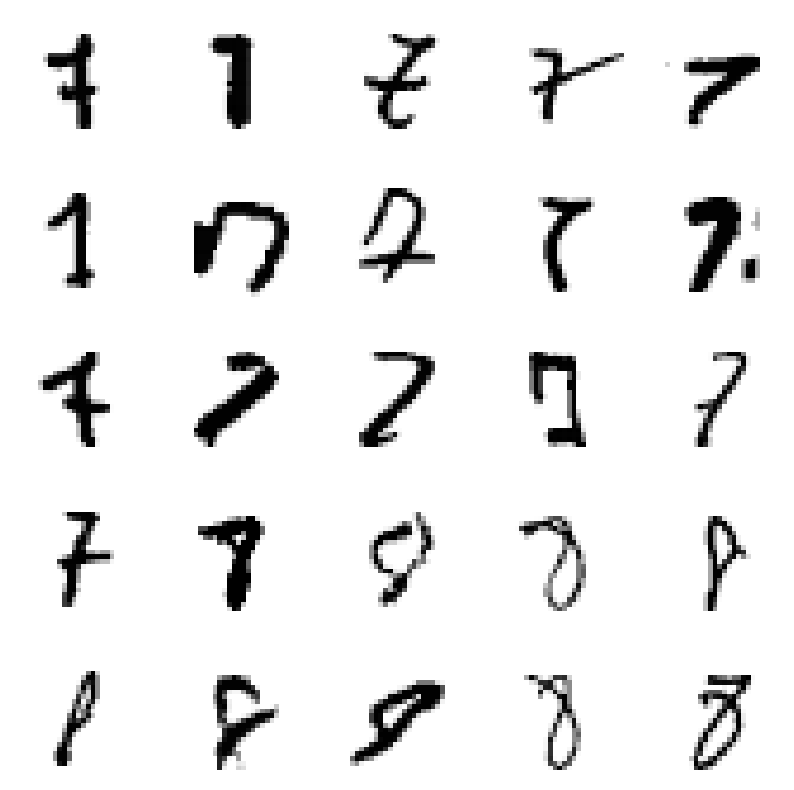

In [21]:
# Plot the misclassified images
plt.subplots(5, 5, figsize=(10, 10))

for i in range(len(ind_wrong)):
    l1 = plt.subplot(5, 5, i + 1)
    x = X[:, ind_wrong[i]]
    l1.imshow(np.reshape(x, (28, 28)), cmap='Greys')
    l1.axis('off')
plt.show()

In [36]:
# Investigate influence of lambda
## ATTENTION_ This takes quite some computation time

lambdas = [ 2**(10-j+1) for j in range(5, 21) ]
print(lambdas)

rate = []

start = datetime.datetime.now().time()
print(start)
for lam in lambdas:
    print(lam)
    # Train for this lambda
    SVM = svm.SVC(C=1/(2*m*lam), kernel='linear')
    SVM.fit(X.T, y)
    
    # Predicted labels on the training data
    label = SVM.predict(X.T)
    
    # Misclassification rate
    rate.append(1 - accuracy_score(y, label))
    
end = datetime.datetime.now().time()
print(end)
print(rate)

[64, 32, 16, 8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
22:40:48.936313
64
32
16
8
4
2
1
0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
23:03:13.603843
[0.4829151535160119, 0.4829151535160119, 0.4829151535160119, 0.38180917794651703, 0.03359194453615055, 0.026658963354242338, 0.023192472763288174, 0.019725982172334122, 0.01551667216903263, 0.012875536480686733, 0.010482007263123094, 0.009326510399471744, 0.00825354902608122, 0.0069329811819082154, 0.00660283922086502, 0.005282271376692016]


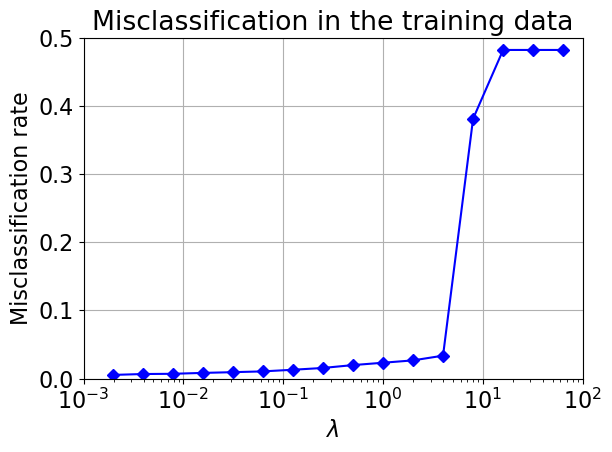

In [39]:
# Plot 
plt.subplots()
plt.semilogx(lambdas, rate,'-D' ,color='b')
plt.grid(True)
plt.xlabel("$ \lambda $")
plt.ylabel("Misclassification rate")
plt.xlim(1e-3, 1e2)
plt.ylim(0, 0.5)
plt.title('Misclassification in the training data')
plt.tight_layout()
plt.show()

useful links 


https://de.mathworks.com/help/stats/support-vector-machines-for-binary-classification.html

https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn.md

https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html
